In [1]:
import numpy as np

In [2]:
rng = np.random.RandomState(123)

In [3]:
d = 2 #データの次元
N = 10 #各パターンのデータ数
mean = 5 #ニューロンが発火するデータの平均値

In [8]:
x1 = rng.randn(N,d) + np.array([0,0])

In [9]:
x2 = rng.randn(N,d) + np.array([mean,mean])

In [10]:
x = np.concatenate((x1,x2), axis=0)

In [11]:
import holoviews as hv

In [15]:
hv.extension('matplotlib')

:Points   [x,y]
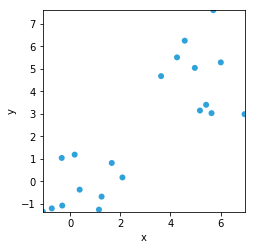

In [20]:
hv.Points(x)

In [21]:
w = np.zeros(d)

In [22]:
b = 0

In [23]:
def y(x):
    return step(np.dot(w,x) + b)

In [24]:
def step(x):
    return 1 * (x > 0)

In [25]:
def t(i):
    if i < N:
        return 0
    else:
        return 1

In [26]:
while True:
    classified = True
    for i in range(N * 2):
        delta_w = (t(i) - y(x[i])) * x[i]
        delta_b = (t(i) - y(x[i]))
        w += delta_w
        b += delta_b
        classified *= all(delta_w == 0) * (delta_b == 0)
    if classified:
        break

In [27]:
w

array([ 0.45771634,  1.5613697 ])

In [28]:
b

-3